In [1]:
x.hepg2.raw <- as.matrix(read.table("~/mount/DEEP_ChIP_HM/01/HepG2/01_HepG2_newBPs_plus_NFR_minus_divergent.x"))
y.hepg2.raw <- as.numeric(readLines("~/mount/DEEP_ChIP_HM/01/HepG2/01_HepG2_newBPs_plus_divergent_mRNA.y"))
print(dim(x.hepg2.raw))
print(length(y.hepg2.raw))

[1] 1242  246
[1] 1242


In [2]:
load("/Users/fateme/mount2/flassoTool/DEEP_allDS_divergent_plus_newBPs/fl_01_HepG2_newBPs_plus_divergent_mRNA.RData")
x.hepg2.normalized <- fl$cv.fl$bestobj$X[, -1]
y.hepg2.normalized <- fl$cv.fl$bestobj$y
print(dim(x.hepg2.normalized))
print(length(y.hepg2.normalized))

[1] 795 246
[1] 795


In [3]:
bin.cnt <- 41

In [4]:
## apply kmeans on both data formats
k <- 3 ## number of clusters
km.raw <- kmeans(x.hepg2.raw, k)
km.normalized <- kmeans(x.hepg2.normalized, k)
print("km.raw cluster sizes:")
print(length(which(km.raw$cluster == 1)))
print(length(which(km.raw$cluster == 2)))
print(length(which(km.raw$cluster == 3)))

[1] "km.raw cluster sizes:"
[1] 364
[1] 423
[1] 455


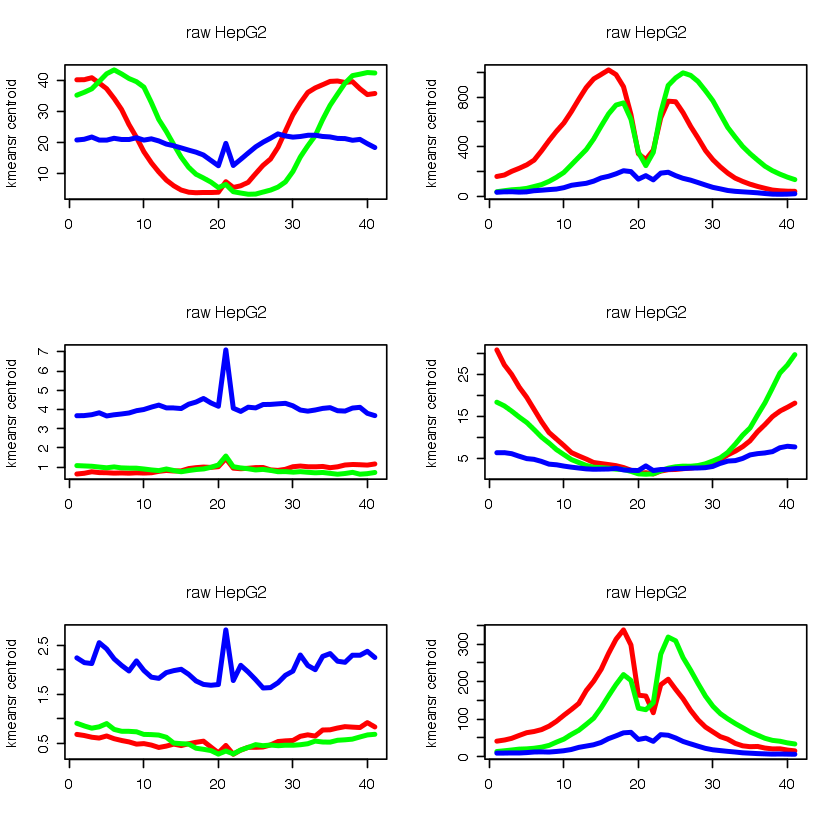

In [5]:
## plot the kmeans results for the raw case
cols <- rainbow(k)
par(mfrow= c(3, 2))

for(hm in seq(6)){
    y.lim <- range(km.raw$center[, seq((hm - 1)* bin.cnt + 1, hm * bin.cnt)])
    plot(km.raw$center[1, seq((hm - 1)* bin.cnt + 1, hm * bin.cnt)], type= "l", lwd= 3, ylim= y.lim, col= cols[1], xlab= "",  ylab= "kmeansr centroid", main= "raw HepG2")
    for(i in seq(2, k))
        lines(km.raw$center[i, seq((hm - 1)* bin.cnt + 1, hm * bin.cnt)], lwd= 3, col= cols[i])
}

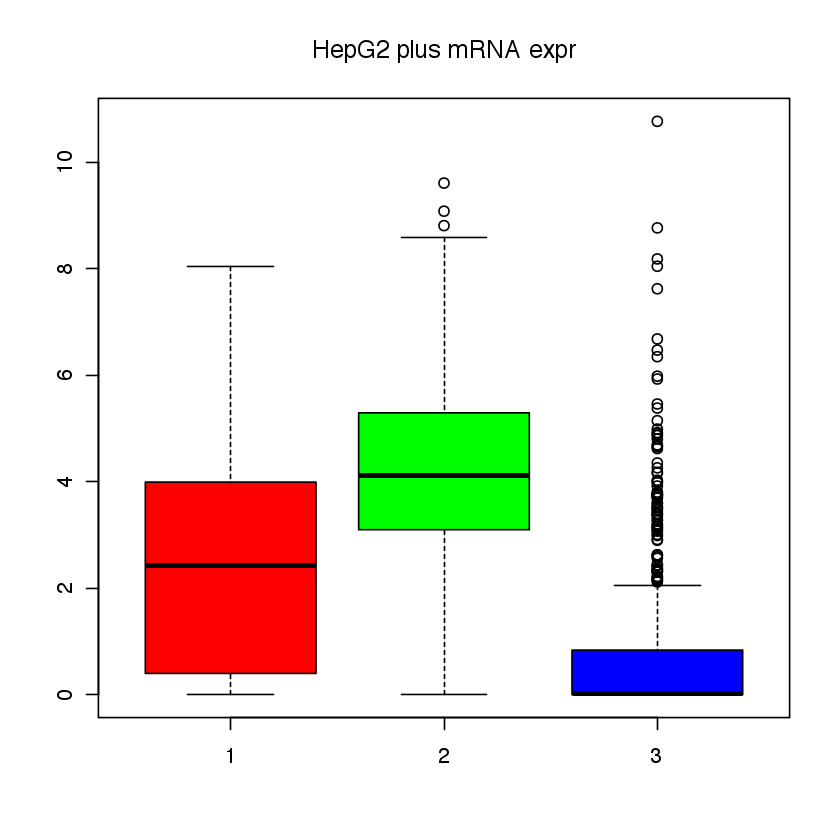

In [6]:
y.hepg2.raw <- log2(1 + y.hepg2.raw)
expr.raw <- list(y.hepg2.raw[which(km.raw$cluster == 1)], y.hepg2.raw[which(km.raw$cluster == 2)], y.hepg2.raw[which(km.raw$cluster == 3)])
boxplot(expr.raw, col= cols, main= "HepG2 plus mRNA expr")

[1] "km.normalized cluster sizes:"
[1] 212
[1] 395
[1] 188


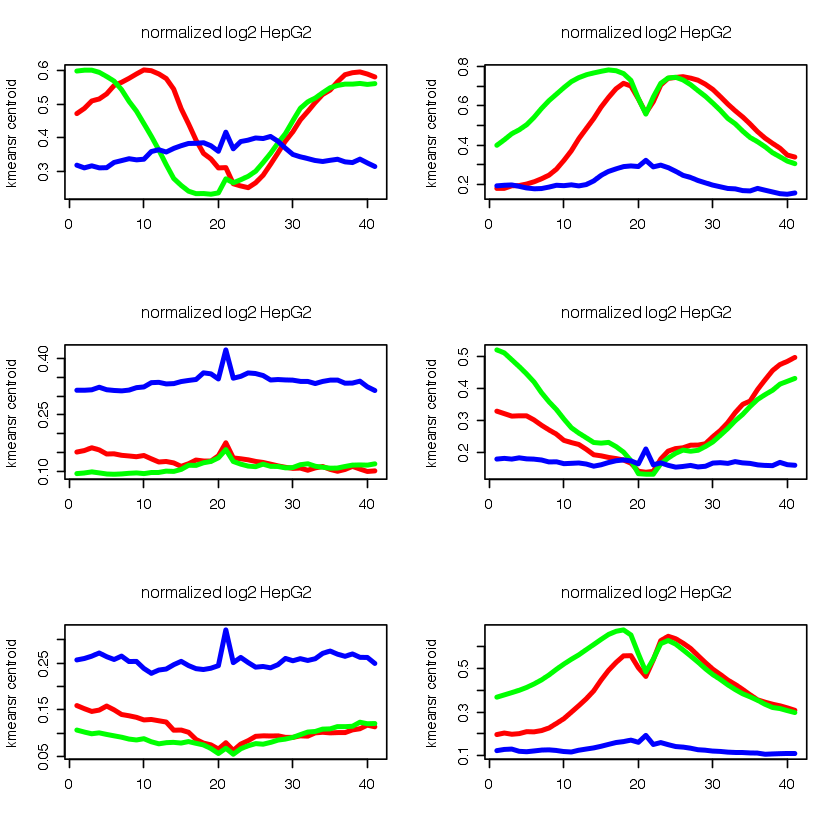

In [7]:
## plot the kmeans results for the raw case
par(mfrow= c(3, 2))

for(hm in seq(6)){
    y.lim <- range(km.normalized$center[, seq((hm - 1)* bin.cnt + 1, hm * bin.cnt)])
    plot(km.normalized$center[1, seq((hm - 1)* bin.cnt + 1, hm * bin.cnt)], type= "l", lwd= 3, ylim= y.lim, col= cols[1], xlab= "", ylab= "kmeansr centroid", main= "normalized log2 HepG2")
    for(i in seq(2, k))
        lines(km.normalized$center[i, seq((hm - 1)* bin.cnt + 1, hm * bin.cnt)], lwd= 3, col= cols[i])
}

print("km.normalized cluster sizes:")
print(length(which(km.normalized$cluster == 1)))
print(length(which(km.normalized$cluster == 2)))
print(length(which(km.normalized$cluster == 3)))

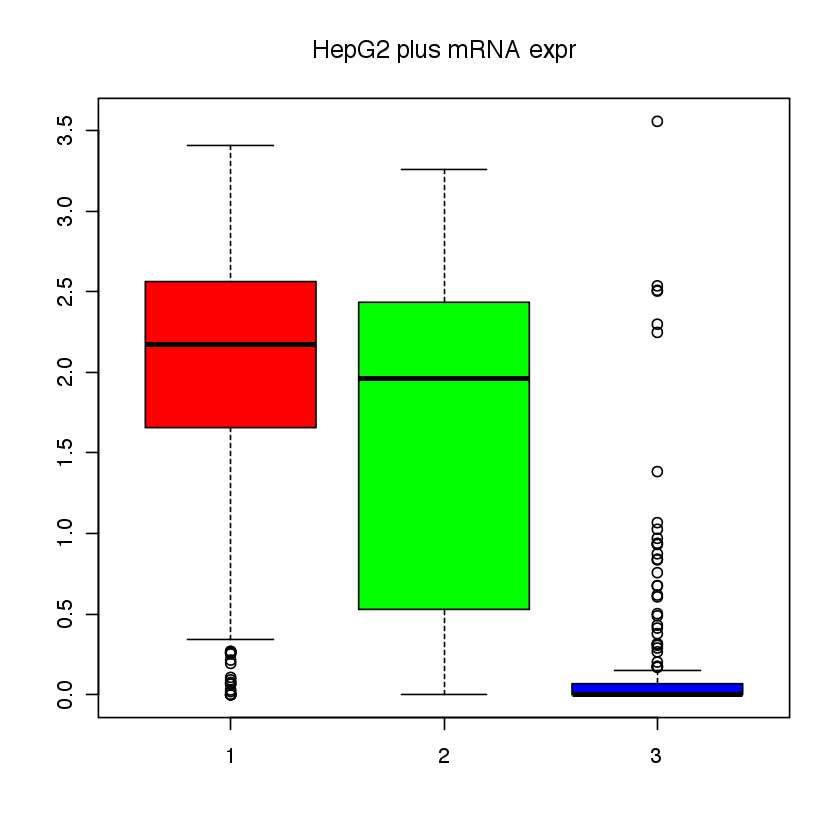

In [8]:
y.hepg2.normalized <- log2(1 + y.hepg2.normalized)
expr.normalized <- list(y.hepg2.normalized[which(km.normalized$cluster == 1)], y.hepg2.normalized[which(km.normalized$cluster == 2)], y.hepg2.normalized[which(km.normalized$cluster == 3)])
boxplot(expr.normalized, col= cols, main= "HepG2 plus mRNA expr")